# Istanbul Customer's Shopping Data

## Author : Mokwebo BRK

## Source : Kaggle

## Github link: https://github.com/mokwebokbr/Learning-from-Data

### The dataset shows the shopping patterns of customers in 10 different malls in Instanbul between 2021 and 2023.

#### Importing libraries

In [49]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from datetime import datetime 
import datetime as d

#### Extracting and reading the dataset

In [50]:
cus_df = pd.read_csv('customer_shopping_data.csv')

#### Checking the first 5 contents of the dataset

In [51]:
cus_df.drop(cus_df.columns[0],axis = 1, inplace = True)
cus_df.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


#### Checking the data types of the dataset

In [52]:
cus_df.dtypes

customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

#### Information about the data

In [53]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99457 non-null  int64  
 3   category        99457 non-null  object 
 4   quantity        99457 non-null  int64  
 5   price           99457 non-null  float64
 6   payment_method  99457 non-null  object 
 7   invoice_date    99457 non-null  object 
 8   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.8+ MB


#### Checking the size of the data, basically the number of rows and columns

In [54]:
print(cus_df.size)
print(cus_df.shape)

895113
(99457, 9)


#### Checking how much/many null values are in the dataset for data cleaning

In [55]:
cus_df.drop_duplicates(inplace=True) 
cus_df.isnull()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99452,False,False,False,False,False,False,False,False,False
99453,False,False,False,False,False,False,False,False,False
99454,False,False,False,False,False,False,False,False,False
99455,False,False,False,False,False,False,False,False,False


In [56]:
cus_df.isnull().sum()

customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

#### The data above is cell, there are no null values found! So the data is relatively clean but will also check if there are duplicates in the data below

In [57]:
cus_df.isnull().duplicated()

0        False
1         True
2         True
3         True
4         True
         ...  
99452     True
99453     True
99454     True
99455     True
99456     True
Length: 99457, dtype: bool

#### Cleaning the data however

In [58]:
print('Gender :', cus_df['gender'].unique().tolist())
print('Category :', cus_df['category'].unique().tolist())
print('Payment method :', cus_df['payment_method'].unique().tolist())
print('Shopping mall :', cus_df['shopping_mall'].unique().tolist())

Gender : ['Female', 'Male']
Category : ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']
Payment method : ['Credit Card', 'Debit Card', 'Cash']
Shopping mall : ['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM', 'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall', 'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center']


#### Showing the malls are in the dataset

In [59]:
print(set(cus_df['shopping_mall'].unique()))
print('The number of malls in the Area is :', len(set(cus_df['shopping_mall'].unique())) )

{'Metrocity', 'Istinye Park', 'Viaport Outlet', 'Zorlu Center', 'Cevahir AVM', 'Mall of Istanbul', 'Forum Istanbul', 'Kanyon', 'Emaar Square Mall', 'Metropol AVM'}
The number of malls in the Area is : 10


#### Getting the average price per category

In [60]:
avg_price_category = pd.DataFrame(cus_df.groupby('category')['price'].mean().sort_values(ascending=False))
avg_price_category.columns = ['average_price']
avg_price_category

,average_price
category,
Technology,3156.935548
Shoes,1807.388568
Clothing,901.084021
Cosmetics,122.448626
Toys,107.733185
Books,45.568621
Souvenir,34.894345
Food & Beverage,15.671948


#### To show the youngest and oldest person to shop

In [61]:
cus_df['age'].min()

18

In [62]:
cus_df['age'].max()

69

#### Some descriptive statistics of my dataset

In [63]:
cus_df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


#### Checking the variance

In [64]:
cus_df.var(ddof =0)

/var/folders/x4/0h0n4_r513g0hb9b0x2thxtc0000gn/T/ipykernel_65540/4188483952.py:1: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



age            224.699453
quantity         1.996620
price       885819.482918
dtype: float64

#### Checking the Mode

In [65]:
print('Mode :\n', cus_df.mode(0),'\n')

Mode :
       customer_id  gender   age  category  quantity   price payment_method  \
0         C100004  Female  37.0  Clothing       3.0  600.16           Cash   
1         C100005     NaN   NaN       NaN       NaN     NaN            NaN   
2         C100006     NaN   NaN       NaN       NaN     NaN            NaN   
3         C100012     NaN   NaN       NaN       NaN     NaN            NaN   
4         C100019     NaN   NaN       NaN       NaN     NaN            NaN   
...           ...     ...   ...       ...       ...     ...            ...   
99452     C999886     NaN   NaN       NaN       NaN     NaN            NaN   
99453     C999910     NaN   NaN       NaN       NaN     NaN            NaN   
99454     C999974     NaN   NaN       NaN       NaN     NaN            NaN   
99455     C999976     NaN   NaN       NaN       NaN     NaN            NaN   
99456     C999995     NaN   NaN       NaN       NaN     NaN            NaN   

      invoice_date     shopping_mall  
0       24/11/20

#### Running the Geometric Mean

In [66]:
print('Geometric mean \n', stats.gmean(cus_df.loc[:, 'age']))

Geometric mean 
 40.60550331292924


#### Finding the Median

In [67]:
print("Median of data:\n", cus_df.median(0))

Median of data:
 age          43.0
quantity      3.0
price       203.3
dtype: float64


/var/folders/x4/0h0n4_r513g0hb9b0x2thxtc0000gn/T/ipykernel_65540/3795920932.py:1: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



#### Checking the percentile of when price is 500

In [68]:
stats.percentileofscore(cus_df.price,500)

57.09100415254833

#### Correlation Matrix

In [69]:
cus_df_corr = cus_df.corr() # Generate correlation matrix
cus_df_corr

/var/folders/x4/0h0n4_r513g0hb9b0x2thxtc0000gn/T/ipykernel_65540/3995705594.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,quantity,price
age,1.000000,0.000667,0.001694
quantity,0.000667,1.000000,0.344880
price,0.001694,0.344880,1.000000


#### Heatmap of the correlations

<Axes: >

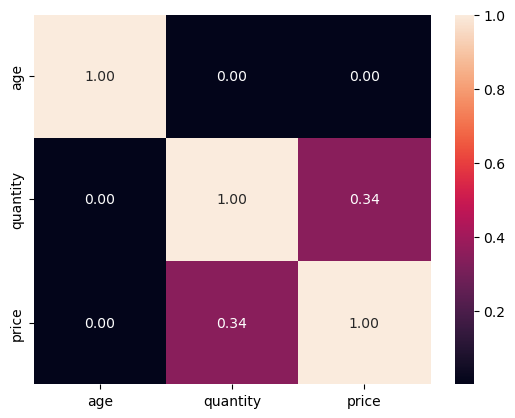

In [70]:
sns.heatmap(cus_df_corr,  fmt=".2f",annot=True)

#### Checking the frequency of the price

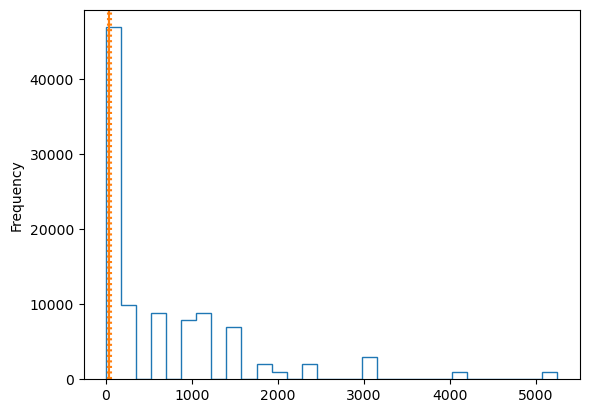

In [71]:
cus_df.price.plot(kind='hist', histtype='step', bins=30)
plt.axvline(cus_df.age.mean(), c ='C1')
plt.axvline(cus_df.age.median(), c ='C1', linestyle ='--')
plt.axvline(cus_df.age.quantile(0.25), c ='C1',linestyle =':')
plt.axvline(cus_df.age.quantile(0.75), c ='C1',linestyle =':')

#### Calculating the count of each gender and representing in a pie chart

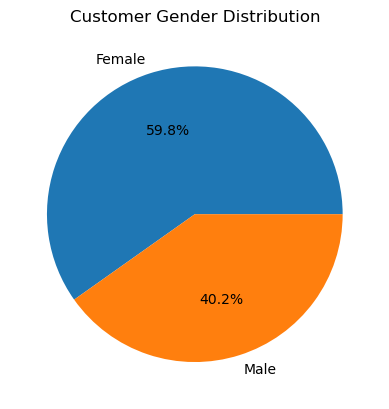

In [72]:
gender_count = cus_df['gender'].value_counts()

fig, ax = plt.subplots()
ax.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
ax.set_title('Customer Gender Distribution')

plt.show()

#### Box plot to show the price's skewness

<function matplotlib.pyplot.show(close=None, block=None)>

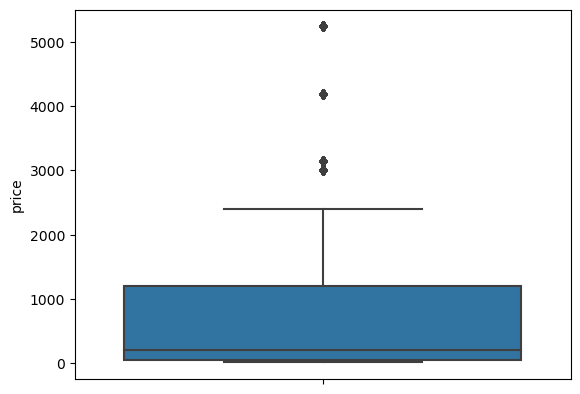

In [73]:
sns.boxplot(y = cus_df['price'])
plt.show

#### Bar plot to find out which gender spends a lot of money on the shopping

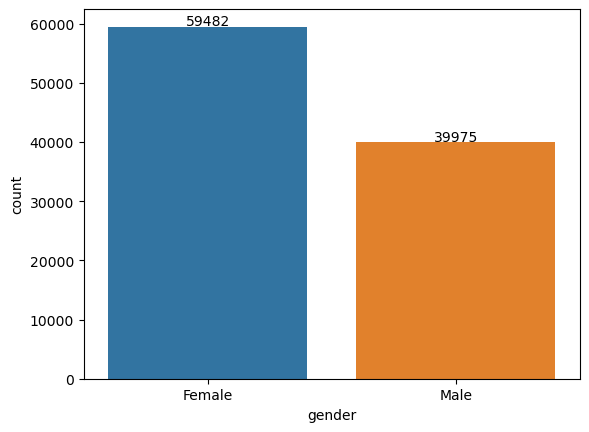

In [74]:
gender = cus_df.gender.value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
g = sns.barplot(data=gender,x='gender',y='count')
for v in gender.itertuples():
    g.text(x=v.Index,y=v.count+200,s=str(v.count), size=10, ha="center")

#### Showing which payment method is mostly used to pay

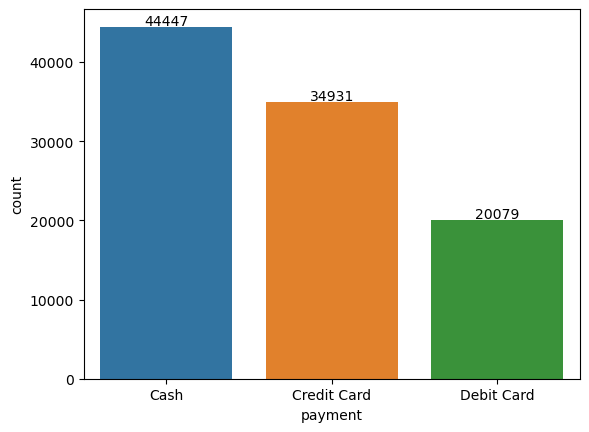

In [75]:
payment = cus_df.payment_method.value_counts().reset_index().rename(columns={'index':'payment','payment_method':
                                                                             'count'})
g = sns.barplot(data=payment,x='payment',y='count')
for k in payment.itertuples():
    g.text(x=k.Index,y=k.count+200,s=str(k.count), size=10, ha="center")
plt.show()

### Which mall/s is mostly visited?

#### Getting the count of each shopping mall

In [76]:
mall_count = cus_df['shopping_mall'].value_counts()

#### Bar chart to visualize the count of each shopping mall

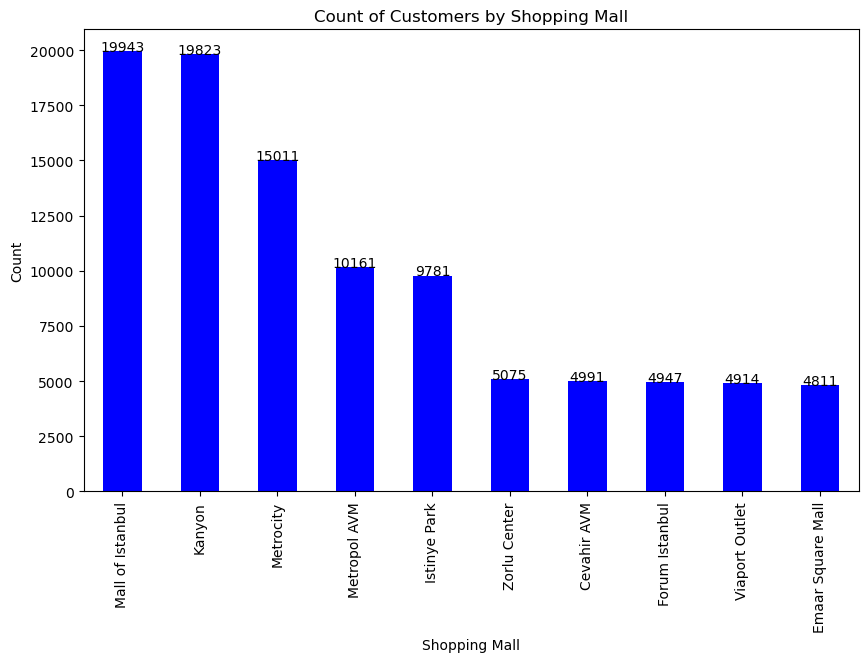

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
mall_count.plot(kind='bar', color='blue')
plt.xlabel('Shopping Mall')
plt.ylabel('Count')
plt.title('Count of Customers by Shopping Mall')

for k, count in enumerate(mall_count):
    plt.text(k, count+10, str(count), ha='center')

plt.show()

#### This shows where exactly most or rather the category in which customers spend their money

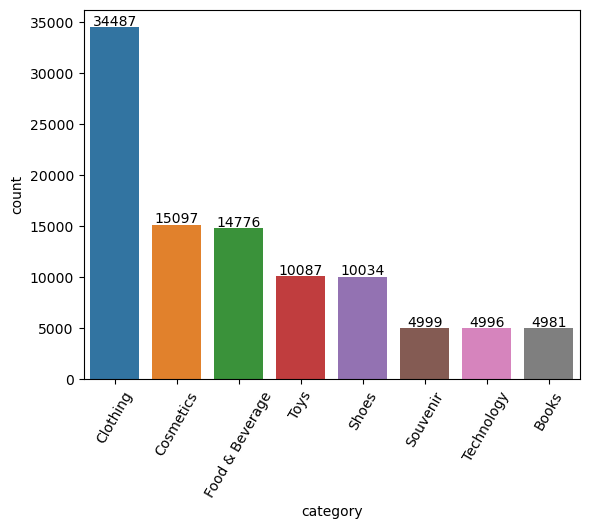

In [78]:
category = cus_df.category.value_counts().reset_index().rename(columns={'index':'category','category':'count'})
k = sns.barplot(data=category,x='category',y='count')
for j in category.itertuples():
    k.text(x=j.Index,y=j.count+200,s=str(j.count), size=10, ha="center")
plt.xticks(rotation=60)
plt.show()

#### Creating a sales column

In [79]:
cus_df['sales'] = cus_df['quantity'] * cus_df['price'] 
cus_df['sales']

0         7502.00
1         5401.53
2          300.08
3        15004.25
4          242.40
           ...   
99452      293.25
99453       20.92
99454       20.92
99455    16800.00
99456      105.57
Name: sales, Length: 99457, dtype: float64

#### Box plot to detect outliers on the price column

<Axes: >

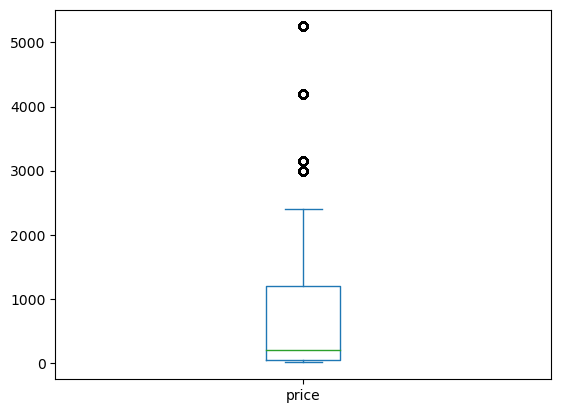

In [80]:
cus_df['price'].plot(kind = 'box')

#### Creating a scatter plot to visualize the relationship between price and quantity

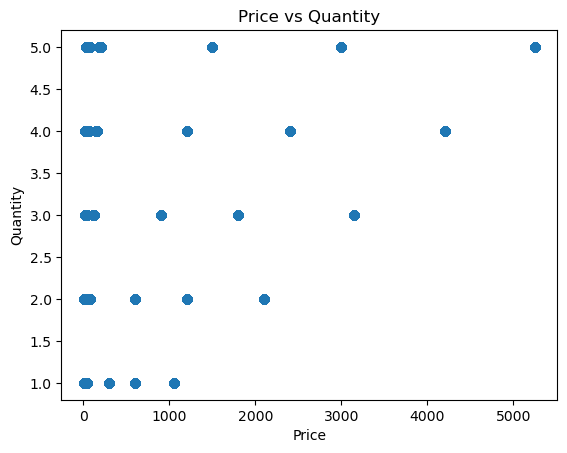

In [81]:
plt.scatter(x='price', y='quantity', data=cus_df)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity')
plt.show()

#### Pair plot of Age, Quantity, Price and Sales

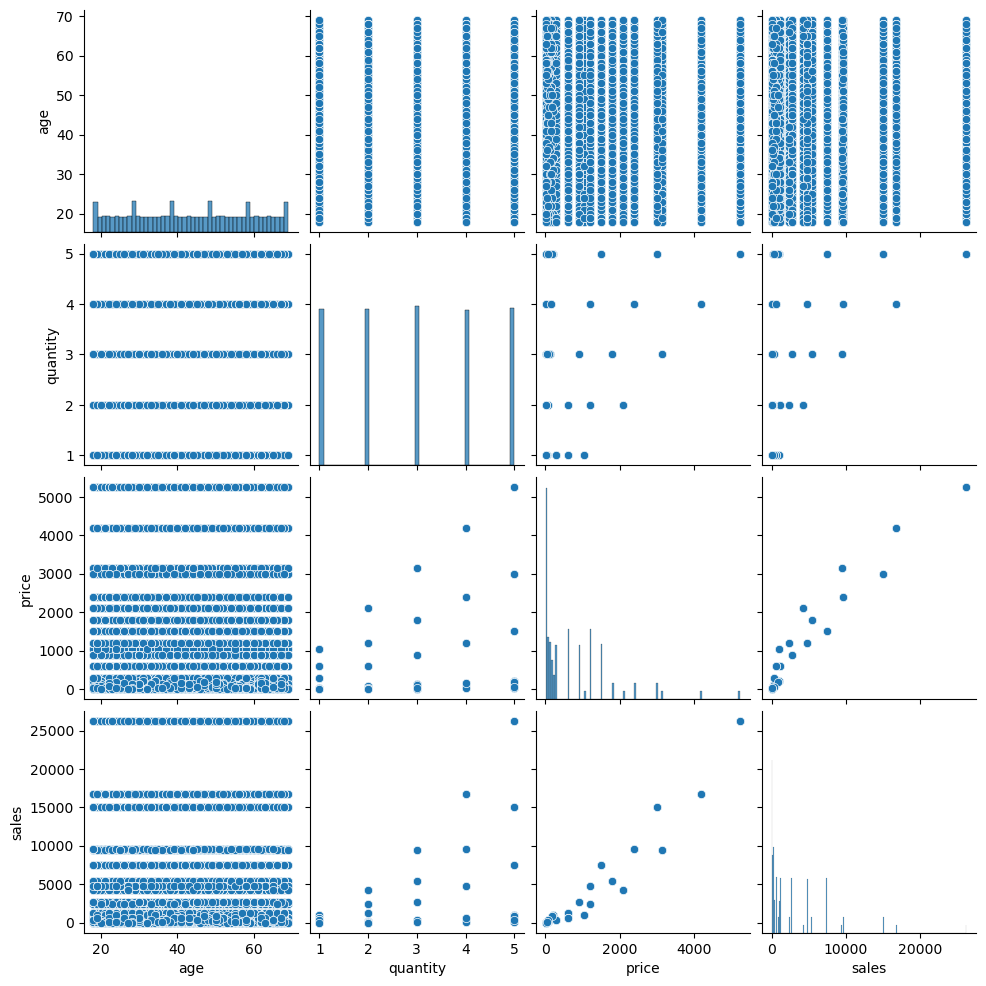

In [82]:
sns.pairplot(cus_df)

#### Histogram showing the prices and sales

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'quantity'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

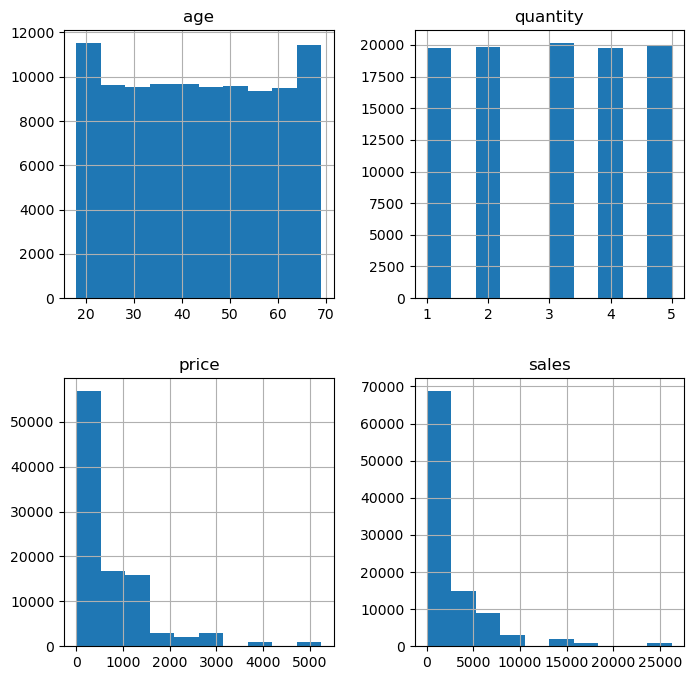

In [83]:
cus_df.hist(figsize=(8,8))

In [84]:
cus_df['invoice_date'] = pd.to_datetime(cus_df['invoice_date'], dayfirst=True)
cus_df['Day'] = cus_df['invoice_date'].dt.day_name()
cus_df['Month'] = cus_df['invoice_date'].dt.month_name()
cus_df['MonthNo'] = cus_df['invoice_date'].dt.month
cus_df['Year'] = cus_df['invoice_date'].dt.year

#### To show which months had highest purchases

In [85]:
figure= px.bar(cus_df,x=cus_df['Month'].value_counts().index ,y= cus_df['Month'].value_counts().values)
figure.update_xaxes(title='Month')
figure.update_yaxes(title='Total Sales')
figure.update_traces(marker_color='blue')

### Summary about the data

### The data and the visualisations above shows that between 2021 - and the release of this data set, the most mall that people shop at is Mall of Instanbul, then closely followed by Kanyon mall, and most of the people who shop are females at almost 60%. 

### People prefer using cash as a mode of payment, because it is the traditional way of shopping, then followed by credit card, because things can be bought by credit then paid back as time goes, and because females like credit than males, then after debit card.

### Most shopping happens in January, that's because that is when the year begins , and its a new dawn of everything.

### The youngest person that shops in about 18 years old and the oldest is 69.